In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [23]:
d=pd.read_csv('/content/insurance_dataset.csv')

In [24]:
d.head()

,Policy_ID,Age,Gender,Marital_Status,Annual_Income,Policy_Type,Claim_Frequency,Claim_Amount,Tenure_Years,Cluster
0,1001,56,Female,Divorced,102986,Auto,0,5327.23,14,1
1,1002,69,Female,Divorced,109643,Health,2,384.66,18,1
2,1003,46,Male,Married,40764,Auto,2,144.25,15,2
3,1004,32,Male,Single,128940,Health,3,1453.97,2,0
4,1005,60,Female,Married,106027,Health,1,112.27,10,1


In [25]:
d.shape

(200, 10)

In [26]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Policy_ID        200 non-null    int64  
 1   Age              200 non-null    int64  
 2   Gender           200 non-null    object 
 3   Marital_Status   200 non-null    object 
 4   Annual_Income    200 non-null    int64  
 5   Policy_Type      200 non-null    object 
 6   Claim_Frequency  200 non-null    int64  
 7   Claim_Amount     200 non-null    float64
 8   Tenure_Years     200 non-null    int64  
 9   Cluster          200 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 15.8+ KB


In [27]:
d.isnull().sum()

,0
Policy_ID,0
Age,0
Gender,0
Marital_Status,0
Annual_Income,0
Policy_Type,0
Claim_Frequency,0
Claim_Amount,0
Tenure_Years,0
Cluster,0


In [28]:
d.dropna()

,Policy_ID,Age,Gender,Marital_Status,Annual_Income,Policy_Type,Claim_Frequency,Claim_Amount,Tenure_Years,Cluster
0,1001,56,Female,Divorced,102986,Auto,0,5327.23,14,1
1,1002,69,Female,Divorced,109643,Health,2,384.66,18,1
2,1003,46,Male,Married,40764,Auto,2,144.25,15,2
3,1004,32,Male,Single,128940,Health,3,1453.97,2,0
4,1005,60,Female,Married,106027,Health,1,112.27,10,1
...,...,...,...,...,...,...,...,...,...,...
195,1196,69,Female,Single,119518,Health,1,258.34,8,1
196,1197,30,Female,Divorced,119835,Health,2,5220.59,14,0
197,1198,58,Male,Single,48016,Health,6,1328.57,4,0
198,1199,20,Male,Single,43960,Life,0,1166.24,1,2


In [29]:
d.isnull().sum()

,0
Policy_ID,0
Age,0
Gender,0
Marital_Status,0
Annual_Income,0
Policy_Type,0
Claim_Frequency,0
Claim_Amount,0
Tenure_Years,0
Cluster,0


In [30]:
x=d.iloc[:,[8,9]].values

In [31]:
print(x)

[[14  1]
 [18  1]
 [15  2]
 [ 2  0]
 [10  1]
 [12  2]
 [17  2]
 [ 8  2]
 [11  1]
 [ 3  1]
 [ 6  0]
 [ 9  0]
 [ 6  2]
 [ 9  1]
 [ 7  1]
 [ 9  1]
 [18  0]
 [12  2]
 [ 8  1]
 [ 8  2]
 [18  1]
 [15  2]
 [ 7  1]
 [11  0]
 [16  1]
 [ 4  1]
 [ 6  2]
 [ 3  0]
 [ 9  2]
 [10  2]
 [14  2]
 [11  2]
 [18  1]
 [12  2]
 [12  2]
 [13  2]
 [13  1]
 [19  1]
 [19  1]
 [14  1]
 [ 4  2]
 [13  2]
 [ 8  1]
 [19  2]
 [12  2]
 [18  0]
 [ 6  0]
 [18  0]
 [19  2]
 [ 5  1]
 [ 9  0]
 [ 3  1]
 [10  1]
 [19  1]
 [ 3  2]
 [15  1]
 [ 1  2]
 [ 7  2]
 [12  1]
 [17  2]
 [ 5  2]
 [ 4  0]
 [12  1]
 [18  0]
 [17  2]
 [19  1]
 [ 9  1]
 [ 4  0]
 [ 2  0]
 [ 4  2]
 [ 2  2]
 [15  1]
 [ 2  1]
 [ 4  2]
 [ 6  0]
 [ 7  0]
 [10  2]
 [19  1]
 [19  1]
 [12  2]
 [ 3  2]
 [13  1]
 [18  1]
 [ 8  2]
 [15  1]
 [ 1  2]
 [ 3  1]
 [ 8  2]
 [ 4  2]
 [16  2]
 [10  1]
 [12  1]
 [14  2]
 [14  1]
 [ 2  2]
 [ 5  2]
 [ 5  1]
 [ 6  0]
 [13  2]
 [ 9  1]
 [15  1]
 [14  2]
 [ 7  0]
 [ 2  0]
 [ 7  2]
 [ 6  2]
 [17  0]
 [ 2  2]
 [ 3  2]
 [ 5  0]
 [ 5  0]
 

In [32]:
wcs=[]

In [33]:
for i in range(1,11):
  kmean=KMeans(n_clusters=i,init='k-means++',random_state=2)
  kmean.fit(x)
  wcs.append(kmean.inertia_)

In [36]:
kmean=KMeans(n_clusters=5,init='k-means++',random_state=0)

In [37]:
insurance=kmean.fit_predict(x)

In [38]:
print(insurance)

[1 2 1 4 3 1 2 3 3 4 0 3 0 3 0 3 2 1 3 3 2 1 0 3 2 0 0 4 3 3 1 3 2 1 1 1 1
 2 2 1 0 1 3 2 1 2 0 2 2 0 3 4 3 2 4 1 4 0 1 2 0 0 1 2 2 2 3 0 4 0 4 1 4 0
 0 0 3 2 2 1 4 1 2 3 1 4 4 3 0 2 3 1 1 1 4 0 0 0 1 3 1 1 0 4 0 0 2 4 4 0 0
 4 3 1 0 1 1 3 3 4 1 2 3 3 1 3 4 0 3 3 1 4 3 0 1 0 1 0 2 2 1 1 1 0 1 2 1 4
 3 0 4 4 0 0 0 4 2 2 1 1 3 2 3 4 2 0 1 3 2 1 0 1 2 2 3 3 2 4 3 0 0 1 1 4 4
 3 3 2 2 2 3 1 3 2 1 3 1 0 4 4]


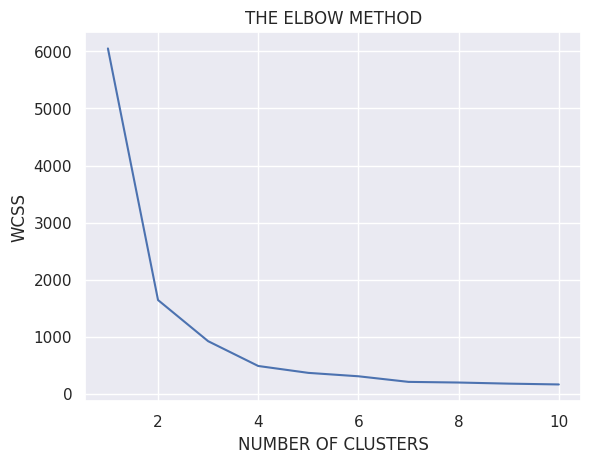

In [39]:
sns.set()
plt.plot(range(1,11),wcs)
plt.title('THE ELBOW METHOD')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('WCSS')
plt.show()

In [40]:
kmean=KMeans(n_clusters=5,init='k-means++',random_state=0)

In [41]:
y=kmean.fit_predict(x)

In [44]:
d['cluster']=y

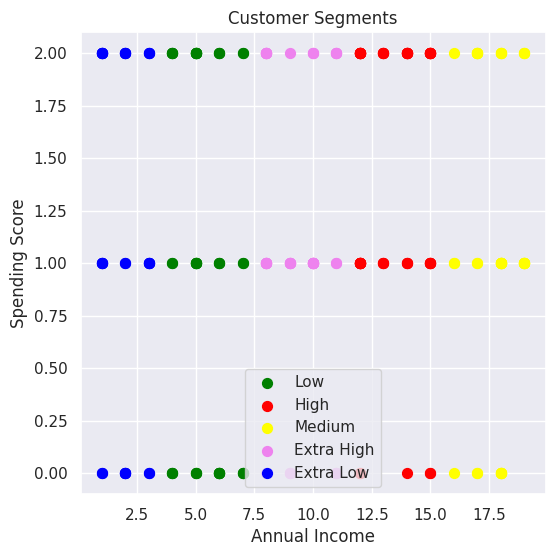

In [51]:
plt.figure(figsize=(6,6))
plt.scatter(x[y==0,0],x[y==0,1],s=50,c='green',label='Low')
plt.scatter(x[y==1,0],x[y==1,1],s=50,c='red',label='High')
plt.scatter(x[y==2,0],x[y==2,1],s=50,c='yellow',label='Medium')
plt.scatter(x[y==3,0],x[y==3,1],s=50,c='violet',label='Extra High')
plt.scatter(x[y==4,0],x[y==4,1],s=50,c='blue',label='Extra Low')
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

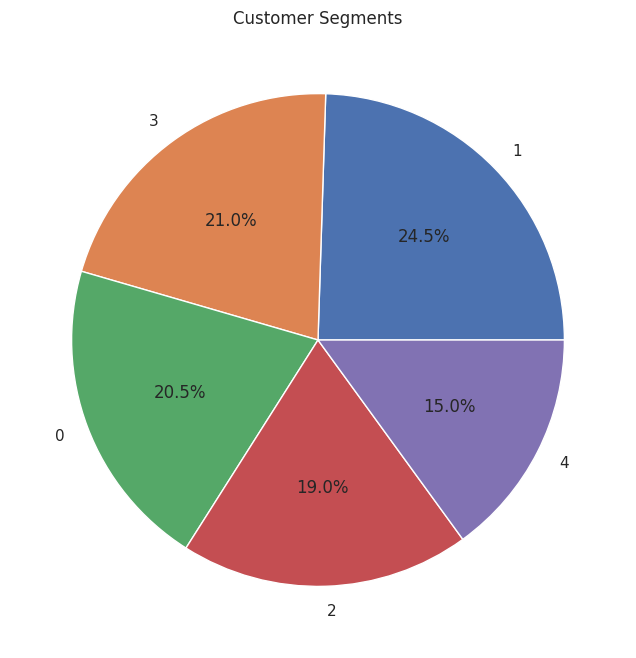

In [53]:
c=pd.Series(insurance).value_counts()
plt.figure(figsize=(8,8))
plt.pie(c,labels=c.index,autopct='%1.1f%%')
plt.title('Customer Segments')
plt.show()
